# Numerical wave-fence interaction in SWASH
---

# Introduction
---

Numerical models have been applied in many fields, and it is more important to apply them to solve the coastal hydraulic problem thank to the rapid development of computing technology. The numerical technique can be based on the finite element method, finite difference method , boundary element method, finite volume method and Eulerian-Lagrangian method. The time-stepping algorithm can be implicit, semi-implicit, explicit, or characteristic-based. The shape function can be of the first order, second order, or a higher order. The modelling can be simplified into different spatial dimensions, i.e., a one-dimensional (1D) model, two-dimensional (2D) depth-integrated model, 2D lateral-integrated model, 2D layered model and 3D model [(Coastal Wiki)](http://www.coastalwiki.org/wiki/Modelling_coastal_hydrodynamics).

**SWASH**
The [SWASH](https://swash.sourceforge.io/) (an acronym of Simulating WAves till SHore) is a non-hydrostatic wave-flow model and is intended to be used for predicting transformation of dispersive surface waves from offshore to the beach for studying the surf zone and swash zone dynamics, wave propagation and agitation in ports and harbours, rapidly varied shallow water flows typically found in coastal flooding resulting from e.g. dike breaks, tsunamis and flood waves, density driven flows in coastal waters, and large-scale ocean circulation, tides and storm surges. Many studies have applied this model to solve coastal problem, including the nearzone, sediment transport, and vegetation interaction. The related publication can be found [here](https://swash.sourceforge.io/references/references.htm).

**SWAN**
Moreover, [SWAN](https://swanmodel.sourceforge.io/) is a third-generation wave model, developed at Delft University of Technology, that computes random, short-crested wind-generated waves in coastal regions and inland waters. Many related publications that taken into account SWAN to solve ocean issues can be found [here](https://swanmodel.sourceforge.io/references/references.htm).

SWAN accounts for the following physics:
  * Wave propagation in time and space, shoaling, refraction due to current and depth, frequency shifting due to currents and non-stationary depth.
  * Wave generation by wind.
  * Three- and four-wave interactions.
  * Whitecapping, bottom friction and depth-induced breaking.
  * Dissipation due to aquatic vegetation, turbulent flow and viscous fluid mud.
  * Wave-induced set-up.
  * Propagation from laboratory up to global scales.
  * Transmission through and reflection (specular and diffuse) against obstacles.
  * Diffraction.

There are also many numerical models that can be suitable for simulating coastal hydralic problems, such as Sbeach, Xbeach, Duros Plus, Litpack, Genesis, Unibest-CL, Delft3D, Telemac, EFDC.

---

# SWASH model
---

The SWASH model have been applied in wave propagation to the shore and was validated in many studies, for example, wave attenuation and wave breaking processes in the swash-zone [(Smit, Zijlema, and Stelling, 2013)](https://www.sciencedirect.com/science/article/abs/pii/S0378383913000215?via%3Dihub). Furthermore, most of studies which consider wave reduction due to vegetation are also taken into account the SWASH model with the vegetation implementation as a good tools. 

The PhD thesis of [Phan, L.K. (2019)](https://research.tudelft.nl/en/publications/wave-attenuation-in-coastal-mangroves-mangrove-squeeze-in-the-mek), including a study of the effect of nonlinear wave reduction by vegetation, present an example of applying SWASH model. Moreover, [Cao 2016](https://bioone.org/journals/journal-of-coastal-research/volume-75/issue-sp1/SI75-167.1/Numerical-Modeling-of-Wave-Transformation-and-Runup-Reduction-by-Coastal/10.2112/SI75-167.1.short) studied wave transformation and run up reduction by coastal vegetation and especially the consideration of both horizontal and vertical components of mangroves in SWASH model in study of [Suzuki et al. (2019)](https://www.sciencedirect.com/science/article/abs/pii/S0378383917304179?via%3Dihub) brings to the new explaination for wave attenuation inside an mangrove area. 

Eventually, [Dao et al., 2021](https://journals.open.tudelft.nl/jchs/article/view/5612) validated and calibrated the SWASH model using experimental data of wave damping due to wooden fence by applying the new vegetation implementation equation in [Suzuki et al. 2019](https://www.sciencedirect.com/science/article/pii/S0378383917304179).

The mentioned examples are proven the trust of using this model for further simulations, especially in the laboratory condition, even though it is even more confident if validating the model with the field measurement data. Thus, this model can be a good computational laboratory for studying purpose. 

## Wave propation in SWASH
Before practicing, it is recommendedn that users should read the User Manual and examples on the official website of SWASH. Also, the brief guideline for installation, interpretation of commnand files and bathymetry for 1D simulation can be found [here](https://colab.research.google.com/drive/1M7YrSOv6xSdRSPI2K2ttvPI689O7bMaU).

In this practice, users successfully run 1D test of wave propagation to the shore from the water depth of 10 m. The forshore slope is 1:10, uniform and rectangular. Still water level is 0.0 m. The wave conditions are regular with Hrms = 1.0 m, and T = 5.5 seconds.

The outputs are wave height at 8 m, 5 m, and 1 m water depth. And calculating wave heights, wavelengths, and wave periods at the same locations from elevation results.

## Loading package
(Must run before doing exercises)

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Resolution

Firstly, all the required files to successfully run the model with above parameters are the input command, and the bathymetry. But first, it is needed to calculate several constant variables.

Hypothesizing that wave will travel to the shallow zone, where d/L $\approx$ 1/20.
As moving to the shore, the resolution (dx) of the model should be samller than at the deep water. However, there is impossible to have more than two resolutions in SWASH, therefore, it is recommended to calculate
dx at the shallow zone, and apply to the whole domain. The dx is normally between L/50 to L/100 where L is wavelength in the shallow zone. 

Note that smaller resolution will increase the real computation time. So choose wisely!

In this practice, the computational domain will be hypothesized with 100 m long, waves will propagate from the west side at water depth of 10 m. Regular waves with height of 1.0 m and wave period of 5.5 s are the imput at the boundary at west side. The calculation for resolution, computation meshes, and bathymetry will be presented next.

---

In [ ]:
# Wavelength function
def wavelength(T,d):
    """ 
    Wave length calculation based on period (T) and water depth (d)
    """
    # wavelength at deep water
    g = 9.81
    L0 = (g*T**2)/(2*np.pi)
    guess = L0
    L = (g*T**2)/(2*np.pi)*np.tanh((2*np.pi)*(d/guess))
    diff = abs(L-guess)
    # wavelength at intermediate water depth and shallow water
    while diff > 0.01:
        diff = abs(L-guess)
        guess = L + (0.5*diff)
        L = (g*T**2)/(2*np.pi)*np.tanh((2*np.pi)*(d/guess))
    return L0,L
# Calculation wavelenght in order to estimate proper resolution of the model
# Before caluculating, check the water zone if waves are in.
import numpy as np
# Initial wave characters
T = 5.5                                          # Wave periods [s]
Hrms = 1.0                                       # Wav heights [m]
watzone = ['Deep', 'Intermediate', 'Shallow']    # Set name of water zone
watzone_dee = 0.5                                # Set min value for deep water
watzone_sha = 0.05                               # Set max value for shallow water
d = np.array([10.0, 5.0,
              1.0, 0.75, 0.5])                   # Intermediate and shallow water
# Calculate resolutions
nL = len(d)
L = np.zeros(nL)
dx_min = np.zeros(nL)                            # minimum model resolutions
dx_max = np.zeros(nL)                            # maximum model resolutions
for i in range(nL):
    L0,L[i] = wavelength(T,d[i])
    # Resolutions
    dx_min = L/100
    dx_max = L/50
    # Update values
    L = np.round(L,2)
    L0 = np.round(L0,2)
    dx_min = np.round(dx_min,2)
    dx_max = np.round(dx_max,2)
    # Print out initial wave period and water depth
    print('\nWave period is ' + str(T) + str(' s') 
    + str(', and wave height Hrms is ' + str(Hrms)) + str(' m'))
    print('Water depth is at ' + str(d[i]) + str(' m'))
    # Print out water zone
    dL = np.round(d / L,2)
    if dL[i] >= watzone_dee:
        print('Waves are in ' + str(watzone[0]) + str(' water, ') 
        + str('d/L = ') + str(dL[i]) + str(' > ') + str(watzone_dee))
    elif watzone_sha <= dL[i] < watzone_dee:
        print('Waves are in ' + str(watzone[1]) + str(' water, ') 
        + str(watzone_sha) + str(' < ') + str('d/L = ') 
        + str(dL[i]) + str(' < ') + str(watzone_dee))
    else:
        print('Waves are in ' + str(watzone[2]) + str(' water, ') 
        + str('d/L = ') + str(dL[i]) + str(' < ') + str(watzone_sha))
    dL = np.seterr(divide='ignore')
    # Print out wavelength at chosen water depth
    print('* Wavelength is ' + str(L[i]) + str(' m.'))
    # Print out resolution at each water depth
    print('* Maximum resolution (dx_max) is ' + str(dx_max[i]) + str(' m.'))
    print('* Minimum resolution (dx_min) is ' + str(dx_min[i]) + str(' m.'))

# Which resolution for the excersise do you choose?
dx = np.round(np.mean(dx_min[1:-1]),2)               # Calculating dx from all dx_min except the value in deep water
print('\nThe resolution of the model should be \n an average value of dx_min, \n except the value at deep water, \n and it is ' 
      + str(dx) + str(' m.'))


Wave period is 5.5 s, and wave height Hrms is 1.0 m
Water depth is at 10.0 m
Waves are in Intermediate water, 0.05 < d/L = 0.24 < 0.5
* Wavelength is 42.55 m.
* Maximum resolution (dx_max) is 0.85 m.
* Minimum resolution (dx_min) is 0.43 m.

Wave period is 5.5 s, and wave height Hrms is 1.0 m
Water depth is at 5.0 m
Waves are in Intermediate water, 0.05 < d/L = 0.15 < 0.5
* Wavelength is 34.23 m.
* Maximum resolution (dx_max) is 0.68 m.
* Minimum resolution (dx_min) is 0.34 m.

Wave period is 5.5 s, and wave height Hrms is 1.0 m
Water depth is at 1.0 m
Waves are in Intermediate water, 0.05 < d/L = 0.06 < 0.5
* Wavelength is 16.84 m.
* Maximum resolution (dx_max) is 0.34 m.
* Minimum resolution (dx_min) is 0.17 m.

Wave period is 5.5 s, and wave height Hrms is 1.0 m
Water depth is at 0.75 m
Waves are in Intermediate water, 0.05 < d/L = 0.05 < 0.5
* Wavelength is 14.67 m.
* Maximum resolution (dx_max) is 0.29 m.
* Minimum resolution (dx_min) is 0.15 m.

Wave period is 5.5 s, and wave he

### Generate bottom level
create_zp_xp_swash(T, d0, i_slope, len_slope)

Inputs:
  Wave period: T, and Water depth at boundary: d0. They are used to calculate wavelength
  Designed slopes and length of slope used in your profile

Outputs:
  xp, zp with the number of mesh.
  Resolution dx

---

In [ ]:
def create_zp_xp_swash(T, d0, i_slope, len_slope):
    # Libary
    import numpy as np
    import matplotlib.pyplot as plt
    T = np.array(T)
    count_T = len(np.atleast_1d(T))
    if count_T >= 2:
        Tmin_id = np.argmin(T)
        Tmin = T[Tmin_id]
        print('Minimum wave period to calculate dx is ' + str(Tmin) + str(' s.'))        
    else:
        Tmin = T
        print('Initial wave period to calculate dx is ' + str(Tmin) + str(' s.'))

    # Calculate dx
    watzone_deep = 0.5       # Set min value for deep water
    watzone_shal = 0.05      # Set max value for shallow water
    L0,L = wavelength(Tmin,d0)
    dL = d0/L
    if dL > watzone_deep:
        print('Warning 1: dx is too large, \n reducing water depth by half; \n re-calculate wavelength')
        d1 = d0*(1/2)
        L0,L1 = wavelength(Tmin, d1)
        dx = np.round(L1/100,2)
        print('Result: dx is '+ str(dx) + str(' m.'))
    elif watzone_shal < dL <= watzone_deep:
        print('Warning 2: dx is still large, reducing water depth by half;')
        d2 = d0*(1/2)
        L0,L2 = wavelength(Tmin, d2)
        dx = np.round(L2/100,2)
        print('Result: Intermediate water, \n dx is ' + str(dx) + str(' m.'))
    else:
        dx = np.around(L/100,2)
        print('Result: Shallow water dx is ' + str(dx) + str(' m.'))

    # Convert initial profile characteristics
    i_slope = np.array(i_slope)
    i_slope = np.append(0, i_slope)
    len_slope = np.array(len_slope).astype(np.float64)
    len_slope = np.append(0, len_slope)

    # create array of xp and zp with step dx
    len_slope = np.array(len_slope)
    x = np.cumsum(len_slope).astype(np.float64)
    xp = []
    number_slope_p = [] 
    i_slope_p = []
    for i1 in range(len(x)):
        xp = np.arange(0, x[i1], dx)
        dx_p = np.repeat(dx, len(xp))
        
        temp_number_slope_p = len(np.arange(0, len_slope[i1], dx))
        number_slope_p = np.append(number_slope_p, temp_number_slope_p)
        
        temp_i_slope_p = np.repeat(i_slope[i1], number_slope_p[i1])
        i_slope_p = np.append(i_slope_p, temp_i_slope_p)
    
    differ_number = len(i_slope_p) - len(dx_p)
    repeat_differ_dx = np.repeat(dx, differ_number)
    repeat_differ_xp = np.repeat(xp[-1], differ_number)
    dx_p = np.append(dx_p, repeat_differ_dx)         # update dx_p
    xp = np.append(xp, repeat_differ_xp)             # update xp
    temp_z = d0
    i_dx = i_slope_p * dx_p
    zp = np.full((i_dx.shape[0],2), np.inf, dtype=(np.float64))
    for i3 in range(len(i_dx)):
        # Calculation
        z_i = temp_z - i_dx[i3]
        # Assign
        zp[i3] = [temp_z, z_i]
        # Update for next interation
        temp_z = z_i
    zp = zp[:,0]
    
    # Print some results
    print(' Number of mesh is ' + str(len(zp)))
    print(' Total length of profile is ' + str(x[-1]) + str(' m.\n'))
    # PLot profile
    plt.figure(figsize= (15, 5))
    plt.plot(xp, zp * -1, 'k-', [x[0], x[-1]], [0, 0], 'b--')
    plt.xlim([x[0], x[-1]])
    
    return xp, zp, dx
# Wavelength function
def wavelength(T,d):
    import numpy as np
    """ 
    Wave length calculation based on period (T) and water depth (d)
    """
    # wavelength at deep water
    g = 9.81
    L0 = (g*T**2)/(2*np.pi)
    guess = L0
    L = (g*T**2)/(2*np.pi)*np.tanh((2*np.pi)*(d/guess))
    diff = abs(L-guess)
    # wavelength at intermediate water depth and shallow water
    while diff > 0.01:
        diff = abs(L-guess)
        guess = L + (0.5*diff)
        L = (g*T**2)/(2*np.pi)*np.tanh((2*np.pi)*(d/guess))
    return L0,L

### Calculate and extract files
---

Warning 1: dx is too large reducing water depth by half;
Result: dx is 0.19 m.
Number of mesh is 580
Total length of profile is 110.0 m.

The bottom level file has been saved as: exercise_1.bot .
Please download at content

With the dx of 0.19, the bottom level will now have 
 the total number of meshes is 580 in total 110 m long of the profile.

Output points at depth 8.0 m, is 0.0, 20.0
Output points at depth 5.0 m, is 0.0, 50.0
Output points at depth 1.0 m, is 0.0, 90.0


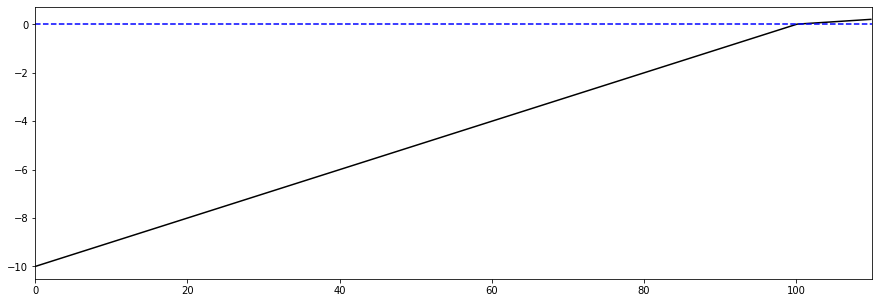

In [ ]:
# Initial parameters
Hrms = 1.0
T = 3.5
d0 = 10
slope = 1/10, 1/50
len_slope = 100, 10
# Bottom level
xp_sw, zp_sw, dx = create_zp_xp_swash(T, d0, slope, len_slope)
slope = np.array(slope)
len_slope = np.array(len_slope)
total_length = np.sum(len_slope)

# Extend one value to make sure that the number of meshes is even
zp_sw = np.append(zp_sw, zp_sw[-1])
xp_sw = np.append(xp_sw, xp_sw[-1])
# Save bottom level
exercise_numb = 1
exercise_name = 'exercise'
nfile_bot = exercise_name + str('_') + str(exercise_numb) + str('.bot')
np.savetxt(nfile_bot, zp_sw, delimiter=',')
print('The bottom level file has been saved as: ' + nfile_bot + str(' .\n') + str('Please download at content'))

# After saving the bottom level, users need to download it and put into one folder 
# in the local drive (PC or Laptop) before getting the command file ready.
print('\nWith the dx of ' + str(dx) + str(', the bottom level will now have \n the total number of meshes is ') + str(len(zp_sw[0:-1])) 
+ str(' in total ') + str(total_length) + str(' m long of the profile.\n'))
# Note that the number of meshes can be changed if users changes the lenght, and resolution dx.

# Create output points
z_output = np.array([-8.0, -5.0, -1.0])
n_output = len(z_output)
x_output = z_output/slope[0] + len_slope[0]             # only consider the profile under still water level
y_output = np.zeros(n_output)
for i in range(n_output):
  print('Output points at depth ' + str(-z_output[i]) + str(' m, is ') + str(y_output[i]) + str(', ') + str(x_output[i]))

In [ ]:
d1

NameError: ignored

### The command lines
---

In [ ]:
# Headline and explanation
print('$********************************* HEADING ************************************')

print('PROJ' + str(" '") + exercise_name + str("' ") + str("'") + str('E') + str(exercise_numb) + str("'"))
print('$ Running 1D test of wave propagation to the shore' + str('\n$ Water depth at boundary is 10 m.')
+ str('\n$ Wave input: T = ') + str(T) + str(' s, Hrms = ') + str(Hrms) + str(' m, ') + str('Regular mode') 
+ str('\n$ Water level = 0.0 m '))

# Model Inputs
print('\n$******************************* MODEL INPUTs *********************************')
print('$$$ Initial parameters')
print('SET level 0.0')      # Set still water level
print('MODE DYN ONED')      # 1D mode
print('COORDINATES CART')   # Coordinates Cartesian
print('VERTICAL 1')         # Vertical layers are set as 1
print('INIT ZERO')          # With this command, model will start as cold start mode
print('\n$$$ Wave characteristic and boundary')
# Computational grid
print('CGRID REG 0. 0. 0. ' + str(total_length) + str(' 0. ') + str(len(zp_sw[0:-1])) + str(' 0'))
# Define the bottom level
print('INPGRID BOTTOM REGULAR 0. 0. 0. ' + str(len(zp_sw[0:-1])) + str(' 0 ') + str(dx) + str(' 0'))
# The bathymetry files in the same directory
print('READINP BOTTOM 1. ' + str("'") + str(nfile_bot)+ str("'") + str(' 1 0 FREE'))
# Define the spectra in both frequency and direction at the boundary
print('BOUnd SHAPespec JONswap')
# Wave characteristic at the boundary
print('BOU SIDE W CCW BTYPE WEAK CON REGular ' + str(Hrms) + str(' ') + str(T) + str(' 0'))

print('\n$$$ Physics')                # This section will defind the physics in the model
print('SPONgelayer E 10')             # Set absorber waves at the end of profile, it is at East side for this cases
print('FRIC CON')                     # Set the friction coefficient as Manning with value as constant = 0.002
print('BREAK')                        # Set the break parameter as default.
print('NONHYDROSTATIC BOX PREC ILU')  # Set the model as non-hydrostatic mode
print('VISC VERT KEPS')               # Set default viscosity

print('\n$$$ Computation schemes')    # See User Manual for more information
print('DISCRET UPW  MOM \nDISCRET UPW  UMOM V MUSCL')
print('DISCRET UPW  UMOM V FIRST \nDISCRET UPW  WMOM V BDF')
print('DISCRET UPW  WMOM V FIRST \nDISCRET CORR MUSCL')
print('TIMEI METH EXPL 0.1 0.8')

# Model Outputs
print('\n$******************************** OUTPUT REQUESTS *****************************')
print('QUANT XP HEXP 10.')               # The quantity can be defined by a specific command. See User Manual for more information
print('QUANTITY HSIG SETUP dur 20 min')  # As above

print('\n$$$ Points and frame')          # Define outputs
# Define output frames
frname = 'fr'                            # Set name of frame
wish_mesh_frame = 4                      # This value is to find how many mesh in one meter of the frame. Here is 4 over 1 m.
n_frame = total_length * wish_mesh_frame    # Number of mesh over the profile
print('FRAME '+ str("'") + frname + str("'") + str(' 0. 0. 0. ')
+ str(total_length) + str(' 0. ') + str(n_frame) + str(' 0')) # Define outputs as a frame

# Define output points.
pname = 'p'
points_no = np.arange(0,n_output,1)
for i in range(n_output):
  print('POINTS ' + str("'") + str(pname) + str(points_no[i]) + str("' ") + str(x_output[i]) + str(' 0. '))
# Note that points can be defined by create a new point file as an input for the model

# Define output type
print('\n$$$ Wave')                # Wave outputs
# Output type
out_type = 'TABLE'                  # Type as table
out_head = 'HEAD'                   # Results with headlines, set NOHEAD for printing without headlines
out_ftype = '.tbw'                  # txt files but with different file type
# Output name
out_n1 = 'XP'                       # x-axis
out_n2 = ' HRMS'                    # Root-mean-squre wave heights
out_n3 = ' SETUP'                   # Wave set-up
out_ts = ' TSEC'                    # Time series, this is for time series output
out_n4 = ' WATLEV'                  # Water level, this is for time series output
out_wr = ' OUTPUT '                 # Time seriers results will be written with this command
#
print(out_type + str(" '") + frname + str("' ") + out_head 
      + str(" '") + exercise_name + str('_fr') + out_ftype + str("' ") 
      + out_n1 + out_n2 + out_n3)
# 
t_rec = 120                              # Second ~ 1/60 min
m_reg = t_rec/60                         # Min
h_rec_01 = '00'                          # Start record time in hour
m_rec_01 = '0' + str(int(m_reg))         # Start record time in minute
s_rec_01 = '00.000'                      # Start record time in second
time_type = ' SEC'                       # Type of time record
total_rec_time = h_rec_01 + m_rec_01 + s_rec_01
#
record_freq = 10                         # Frequency record
dt_record = 1/record_freq                # Record time step
h_rec_02 = ' 00'                         # Record time step in hour
m_rec_02 = '00'                          # Record time step in minute
s_rec_02 = '0' + str(dt_record) + '00'   # Record time step in second
rec_time_freq = h_rec_02 + m_rec_02 + s_rec_02
#
for i in range(n_output):
  print(out_type + str(" '") + pname + str(points_no[i]) + str("' ") + out_head 
        + str(" '") + exercise_name + str('_p') + str(points_no[i]) + out_ftype + str("'") 
        + out_ts + out_n4 + out_wr + total_rec_time + rec_time_freq + time_type)

# Computing
print('\n$$$ Compute')
dt_comp = 0.001                           # Compute time step
hsta_comp = ' 00'                         # Start computation time in hour
msta_comp = '00'                          # Start computation time in min
ssta_comp = '00.000'                      # Start computation time in sec
tsta_comline = hsta_comp + msta_comp + ssta_comp
#
t_comp = 2                                # Total computation time in hour
hend_comp = ' 0' + str(t_comp)            # Start computation time in hour
mend_comp = '00'                          # Start computation time in min
send_comp = '00.000'                      # Start computation time in sec
tend_comline = hend_comp + mend_comp + send_comp
#
print('TEST 1 0')
print('COMPUTE' + tsta_comline + str(' ') + str(dt_comp) + time_type + tend_comline)
print('STOP')

$********************************* HEADING ************************************
PROJ 'exercise' 'E1'
$ Running 1D test of wave propagation to the shore
$ Water depth at boundary is 10 m.
$ Wave input: T = 5.5 s, Hrms = 1.0 m, Regular mode
$ Water level = 0.0 m 

$******************************* MODEL INPUTs *********************************
$$$ Initial parameters
SET level 0.0
MODE DYN ONED
COORDINATES CART
VERTICAL 1
INIT ZERO

$$$ Wave characteristic and boundary
CGRID REG 0. 0. 0. 110 0. 525 0
INPGRID BOTTOM REGULAR 0. 0. 0. 525 0 0.21 0
READINP BOTTOM 1. 'exercise_1.bot' 1 0 FREE
BOUnd SHAPespec JONswap
BOU SIDE W CCW BTYPE WEAK CON REGular 1.0 5.5 0

$$$ Physics
SPONgelayer E 10
FRIC CON
BREAK
NONHYDROSTATIC BOX PREC ILU
VISC VERT KEPS

$$$ Computation schemes
DISCRET UPW  MOM 
DISCRET UPW  UMOM V MUSCL
DISCRET UPW  UMOM V FIRST 
DISCRET UPW  WMOM V BDF
DISCRET UPW  WMOM V FIRST 
DISCRET CORR MUSCL
TIMEI METH EXPL 0.1 0.8

$******************************** OUTPUT REQUESTS ********

## Run model
Some tips during running the model:
  * All files, the command files, '**exercise_01.sws**', and the bottom level, '**exercise_1.bot**', are needed to be in the same directory.
  * It is recommended to create a folder in '***C:\***' drive, such as "**swash_folder**", and put all files in that folder.
  * Twhen the DOS promt pop-up, the directory in that window is '***C:\Users\Username***'. Users must turn back to '***C:\***' directory by using "**cd..**" two times to get to directory '***C:\***'. Then use '**cd swash_folder**' to get to the '***C:\swash_folder***' directory.
  * From this directory, users can check if the files are there by using command '**dir**' to list all files and other directories. Files should be appeared on the promt window.
  * If the users put the '**swash_folder**' in another drive, such as '***D:\***', users simply use command '**D:**' to get to the '***D:\***' directory. Then, all above steps can be repeated to get to the **swash_folder**.
  * To run the model, users must use the command '**swashrun exercise_01.sws**'. Note that the command file must have file type as '***.sws***'.

Users might have some problem when running the model. Do not panic. Go to the **swash_folder**, find the file name **exercise_01.prt**. The model will print all and erros if there is any problem during the run. If there is nothing wrong with the command lines, the model should run smoothly.

---

## Outputs
The outputs of SWASH model are defined in the command lines. In the exercise:
  * the '**exercise_fr.tbw**' file has results of x-axis, significant wave heights, root-mean-square wave heights, and set-up;
  * the '**exercise_pi.tbw**' files, where "i" is the number of output points from 0 to 2, have results of record time, and water level. Their records start at 5 minutes with the dt = 0.01 s, because the model starts as cold start with the command 'initial zero'. The locations of the points are at x = 20, 50 and 90 m according to the water depth -8, -5, and -1 m. 

The required calculations and plots from the exercise are:
  * Wave height at 8 m, 5 m and 1 m water depth.
  * Wave heights, wavelengths, and wave periods at the same locations from elevation results.

---

### Loading outputs
Firstly, let upload the results to this Goolge drive. Note that the output files sometime are very large, users need to consider to do it on Spyders or other Python programes.

---

In [3]:
datafr_url = 'https://raw.githubusercontent.com/HoangTungDao/Wave-fence-SWASH-simulation/e3967c0176a5052116cc6ecc59fbd53af8639f5c/Results/exercise_02fr.tbw'
datap0_url = 'https://raw.githubusercontent.com/HoangTungDao/Wave-fence-SWASH-simulation/e3967c0176a5052116cc6ecc59fbd53af8639f5c/Results/exercise_02p0.tbw'
datap1_url = 'https://raw.githubusercontent.com/HoangTungDao/Wave-fence-SWASH-simulation/e3967c0176a5052116cc6ecc59fbd53af8639f5c/Results/exercise_02p1.tbw'
datap2_url = 'https://raw.githubusercontent.com/HoangTungDao/Wave-fence-SWASH-simulation/e3967c0176a5052116cc6ecc59fbd53af8639f5c/Results/exercise_02p2.tbw'
path_sw = "/content/"
# Loading data
headlines = 7
datafr_sw = np.loadtxt(datafr_url, skiprows=headlines)
datap0_sw = np.loadtxt(datap0_url, skiprows=headlines)
datap1_sw = np.loadtxt(datap1_url, skiprows=headlines)
datap2_sw = np.loadtxt(datap2_url, skiprows=headlines)

### Questions 1
What are wave heights at 8 m, 5 m,  1 m water depth?

---

###### Answers

NameError: ignored

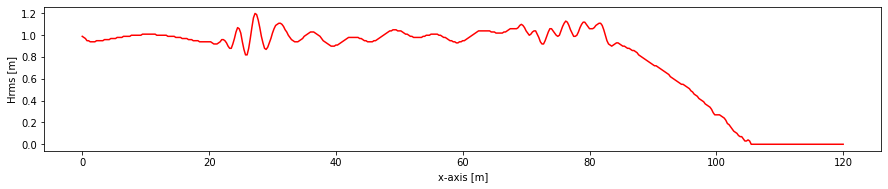

In [4]:
# Plotting wave height along the profile
# Set data 
x_sw = datafr_sw[:,0]
Hrms_all = datafr_sw[:,1]
Hrms_all[Hrms_all == -9] = 0
Hrms_all = np.round(Hrms_all, 2)
Setup = datafr_sw[:,2]
Setup[Setup == -9] = 0
Setup = np.round(Setup, 2)
# plot
plt.figure(figsize= (15, 9))
plt.subplot(3,1,1)
plt.plot(x_sw,Hrms_all, '-r')
plt.xlabel('x-axis [m]')
plt.ylabel('Hrms [m]')
plt.xlim([xp_sw[0], xp_sw[-1]])
plt.ylim([0, 1.5])
plt.grid(1)
plt.subplot(3,1,2)
plt.plot(x_sw,Setup, '-b')
plt.xlabel('x-axis [m]')
plt.ylabel('Set-up [m]')
plt.xlim([xp_sw[0], xp_sw[-1]])
plt.ylim([-0.2, 0.6])
plt.grid(1)
plt.subplot(3,1,3)
plt.plot(xp_sw, -zp_sw, 'k-', [xp_sw[0], xp_sw[-1]], [0, 0], 'b--')
plt.xlabel('x-axis [m]')
plt.ylabel('z-axis [m]')
plt.xlim([xp_sw[0], xp_sw[-1]])
plt.ylim([-zp_sw[0], 3])
plt.grid(1)

# Calculate the cordinates of output points
# Output location at water depth 8, 5 and 1 m.
z_output = np.array([-8.0, -5.0, -1.0])
n_output = len(z_output)
x_output = z_output/slope[0] + len_slope[0]             # only consider the profile under still water level
y_output = np.zeros(n_output)
x_id = []
for i in range(n_output):
  print('\nOutput locations at water depth ' + str(z_output[i]) + str(' m are x,y = (') 
  + str(x_output[i]) + str(', ') + str(y_output[i]) + str(')'))
  # Wave heights at locations 20, 50, and 90 m.
  x_id_temp = np.where(x_sw == x_output[i])
  x_id = np.append(x_id, x_id_temp)
  x_id = x_id.astype(int)
  Hrms_output = Hrms_all[x_id]
  Setup_output = Setup[x_id]
  # Answers
  print('Wave heights at water depth ' + str(-z_output[i]) + str(' m is: ') + str(Hrms_output[i]) + str(' m.'))
  print('Wave set-up at water depth ' + str(-z_output[i]) + str(' m is: ') + str(Setup_output[i]) + str(' m.\n'))

### Questions 2
Significant wave heights, wavelengths, and peak wave periods at the same locations from elevation results.

To do so, the function "Calculation_EHm0Tp" written above can be used.

---

###### Functions

The function Calculation_EHm0Tp is to calculate wave heights from experiment data or time series data
There are three sub-function inside it, the variance density spectrum, spectral moment, and wavelength calculation

**Input**: time series data, nfft, number of column in data file (n, this parameter is depend on measurement sensors), and the sampling frequency (Fs = 1/dt). 

**Output**: spectral density, frequency, the zeroth order or signinficant wave heights, wave period (this is to compare to the initial input at wave generator).

---

In [ ]:
# This function is to calculate wave heights from experiment data or time series data
# There are three sub-function inside it, the variance density spectrum, spectral moment, and wavelength calculation
# Input: time series data, nfft, number of column in data file (n, this parameter is depend on measurement sensors), water depth (d), and the sampling frequency (Fs = 1/dt)
# Output: spectral density, frequency, the zeroth order or signinficant wave heights, wave period (this is to compare to the initial input at wave generator), and wavelength.

def Calculation_EHm0Tp(elevation, nfft, n, Fs):
    import numpy as np
    # This function is to calculate Spectral density at all sensor in the measurement
    # Inputs include the measurement (eta), number of sensors (measured points), and water depth
    # Outputs are spectral density, frequency, wave period, wavelength (deep, intermediate and shallow zones)
    E_tot = []                    # creating an array of variable of spectral density
    f_tot = []                    # creating an array of variable of frequency
    fp_tot = []
    Hm0_tot = []
    for i in range(n):
        # for calculating wave spectrum
        eta_i = elevation[:, i]
        temp_e_tot, temp_f_tot, confLow, confUpp = wave_spectrum(eta_i, nfft, Fs)
        # Update E_tot, f_top
        E_tot = np.append(E_tot, temp_e_tot.flatten())
        f_tot = np.append(f_tot, temp_f_tot.flatten())
        f1 = np.min(temp_f_tot)
        f2 = np.max(temp_f_tot)
        max_id = np.argmax(temp_e_tot)                      # finding index of maximum spectral density
        fp_tot = np.append(fp_tot, temp_f_tot[max_id])      # finding frequency corresponding to max E
        # for calculating wave height
        temp_Hm0_tot = 4*np.sqrt(spectral_moment(temp_f_tot, temp_e_tot, f1, f2, 0))
        Hm0_tot = np.append(Hm0_tot, temp_Hm0_tot)           # update Hm0
    # Convert to array
    E_tot = np.asarray(E_tot, dtype=np.float64).reshape(n, -1).T
    f_tot = np.asarray(f_tot, dtype=np.float64).reshape(n, -1).T
    # Cut 9 column and put into a row, then there are total 902 rows
    # Other calculations
    Tp_tot = 1.0/fp_tot
    Tp = np.round(np.mean(Tp_tot), 2)
    f = f_tot[:, 0]    
    return E_tot, fp_tot,f, Hm0_tot, Tp_tot, Tp
    
# Functions used in above calculations
def wave_spectrum(data,nfft, Fs):
    """
    ### Variance density spectrum
    Compute variance spectral density spectrum of the time-series and its 90% confidence intervals.
    The time series is first divided into blocks of length $nfft$ before being Fourier-transformed.
    **Input**:
        * data: time series
        * nfft: block length
        * Fs: sampling frequency (Hz)
    **Output**:
        * E: variance spectral density. The data is meter, then $E$ is in $m^2/Hz$.
        * f: frequency axis (Hz)
    """
    # cal libs
    import numpy as np
    import scipy.signal 
    from scipy.fftpack import fft        # importing Fourer transform package
    from scipy.stats import chi2         # importing confidence interval package
    
    # Function for calcualting wave spectrum from time-series data
    n = len(data)                                 # Length of the time-series
    nfft = int(nfft - (nfft%2))                   # Length of window contain even number
    data = scipy.signal.detrend(data)             # Detrend the time-series
    nBlocks = int(n/nfft)                         # Number of blocks
    data_new = data[0:nBlocks*nfft]                # Completed blocks
    # The organization of the initial time-series into blocks of length nfft
    dataBlock = np.reshape(data_new,(nBlocks,nfft)) # Each column of dataBlock is one block

    # Definition frequency axis 
    df = Fs/nfft                                  # Frequency resolution of spectrum df=1/[Duration of 1 block]
    f = np.arange(0,Fs/2+df,df)                   # Frequency axis (Fs/2 = max frequency)
    fId = np.arange(0,len(f))                     # 

      # Calculation of the variance for each block and for each frequency
    fft_data = fft(dataBlock,n = nfft,axis = 1)   # Frourier transform of the data
    fft_data = fft_data[:,fId]                    # Only one side needed
    A = 2.0/nfft*np.real(fft_data)                # A(i,b) & B(i,b) contain the Frourier coefficients
    B = 2.0/nfft*np.imag(fft_data)                # 
    E = (A**2 + B**2)/2                           # E(i,b) = ai^2/2 = variance at frequency Fi for the data
    # Averaging the variance over the blocks, and divide by df to ge the variance
    E = np.mean(E,axis = 0)/df                    # 
    # Confidence intervals
    edf = round(nBlocks*2)                        # Degrees of freedom
    alpha = 0.1                                   # Calulation of the 90% confidence interval

    confLow = edf/chi2.ppf(1-alpha/2,edf)         # 
    confUpp = edf/chi2.ppf(alpha/2,edf)           #

    return E,f,confLow,confUpp

def spectral_moment(f,E,f1,f2,n):
    import numpy as np
    """
    Calculate the n th-order spectral moment for a given frequency band [fmin, fmax].
    Input:
        E: variance density spectrum
        f: frequency axis
        fmin and fmax (f1 & f2): minimum and maximum frequency considered in the moment calculation
        n: order of moment (if n = 0, it is the zeroth order)
    Output:
        mn: spectral moment. This varible is to calculate wave height in the same order of moment
    """
    if n >= 0:
        ind_f = np.where((f >= f1)&(f <= f2))[0]
    # indices of the frequencies larger than fmin and smaller than fmax
    else:
        ind_f = np.where((f >= f1)&(f <= f2)&(f!=0))[0]
        # when n < 0, f cannot be equal to zero as f^(-N) = (1/f)^(N) = infinity if f = 0
    mn = np.trapz(E[ind_f] * f[ind_f]**n,f[ind_f]);
    
    return mn

###### Calculations

In [ ]:
# Load variables
Ts = datap0_sw[:,0]      # This time series can be use for all point outputs
eta_p0 = datap0_sw[:,1]  # Elevation at 1st location, wave depth is 8 m.
eta_p1 = datap1_sw[:,1]  # Elevation at 1st location, wave depth is 5 m.
eta_p2 = datap2_sw[:,1]  # Elevation at 1st location, wave depth is 1 m.
eta = np.array([eta_p0, eta_p1, eta_p2]).T

In [ ]:
# Calculations
# Spectral density
nfft = 1000
Fs_p = 1 / dt_record
n_point = 3
E_p, fn_p, f_p, Hm0_p, Tp_allp, Tp_p  = Calculation_EHm0Tp(eta, nfft, n_point, Fs_p)
# Wavelength
depth_p = z_output * -1      # convert to water depth
n_depth = len(depth_p)
L_p = np.zeros(n_depth)
for i in range(n_depth):
  L0_p, L_p[i] = wavelength(Tp_p, depth_p[i])
# Update variables
L0_p = np.round(L0_p,2)
L_p = np.round(L_p,2)
Hm0_p = np.round(Hm0_p,2)
Tp_allp = np.round(Tp_allp,2)

###### Plots and answers

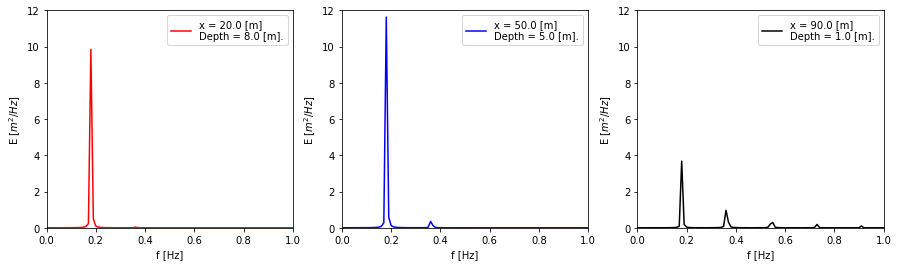

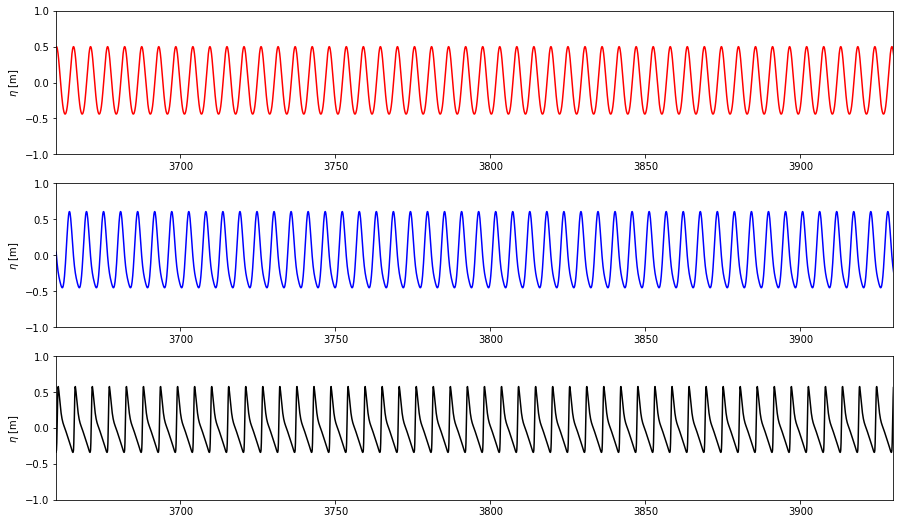

In [ ]:
# Plotting 
char = ('r-', 'b-', 'k-')
# Plotting spectral density
plt.figure(figsize= (15, 4))
for i in range(n_point):
  plt.subplot(1,3,i+1)
  plt.plot(f_p, E_p[:,i], char[i])
  plt.xlim([0, 1])
  plt.ylim([0, 12])
  plt.legend(['x = ' + str(x_output[i]) + str(' [m]')
              + str('\nDepth = ') + str(depth_p[i]) + str(' [m].')])
  plt.xlabel('f [Hz]')
  plt.ylabel('E [$m^2/Hz$]')

# Plotting elevation
nTs = 270
plt.figure(figsize= (15, 9))
for i in range(n_point):
  plt.subplot(3,1,i+1)
  plt.plot(Ts, eta[:,i], char[i])
  plt.xlim([np.mean(Ts), np.mean(Ts+nTs)])
  plt.ylim([-1, 1])
  plt.ylabel('$\eta$ [m]')

In [ ]:
# Answer questions: What are the significant wave heights, wave periods, and wavelength at the same location
for i in range(n_point):
  print('Wave characteristics at water depth ' + str(depth_p[i]) + str(' m, are: ') 
        + str('\n Hrms = ') + str(Hrms_output[i]) + str(' m;')
        + str(' Tp = ') + str(Tp_allp[i]) + str(' s;')
        + str(' and L = ') + str(L_p[i]) + str(' m.\n'))

Wave characteristics at water depth 8.0 m, are: 
 Hrms = 0.94 m; Tp = 5.56 s; and L = 40.73 m.

Wave characteristics at water depth 5.0 m, are: 
 Hrms = 1.04 m; Tp = 5.56 s; and L = 34.7 m.

Wave characteristics at water depth 1.0 m, are: 
 Hrms = 0.73 m; Tp = 5.56 s; and L = 17.04 m.



# Wave-fence simulation
---



[data](https://surfdrive.surf.nl/files/index.php/f/9853086521)
